酶活性預測實戰task
1. 基於T-R-train.csv數據，建立綫性回歸模型，計算其在T-R-test.csv數據上的r2分數，可視化模型預測結果
2. 加入多項式特徵（2次、3次），建立回歸模型
3. 計算多項式回歸模型對測試數據進行預測的r2分數，判斷哪個模型預測更準確
4. 可視化多項式回歸模型數據預測結果，判斷哪個模型預測更准確

In [1]:
#load the data
import pandas as pd
import numpy as np
data_train = pd.read_csv('T-R-train.csv')
data_train

,T,rate
0,46.53,2.49
1,48.14,2.56
2,50.15,2.63
3,51.36,2.69
4,52.57,2.74
5,54.18,2.80
6,56.19,2.88
7,58.58,2.92
8,61.37,2.96
9,63.34,2.95


In [2]:
#define X_train and y_train
X_train = data_train.loc[:,'T']
y_train = data_train.loc[:,'rate']

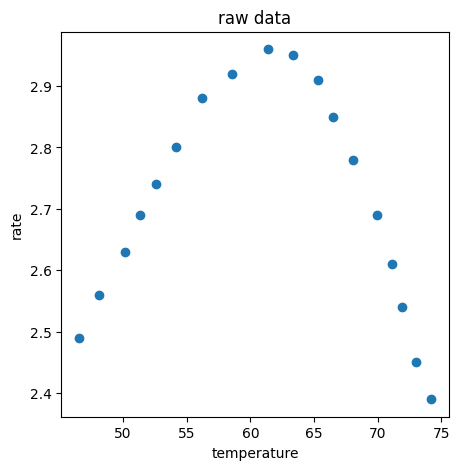

In [3]:
#visualize the data
from matplotlib import pyplot as plt
fig1 = plt.figure(figsize=(5,5))
plt.scatter(X_train,y_train)
plt.title('raw data')
plt.xlabel('temperature')
plt.ylabel('rate')
plt.show()

In [4]:
X_train = np.array(X_train).reshape(-1,1)

In [5]:
#linear regression model prediction
from sklearn.linear_model import LinearRegression
lr1 = LinearRegression()
lr1.fit(X_train,y_train)

LinearRegression()

In [6]:
#load the test data
data_test = pd.read_csv('T-R-test.csv')
data_test

,T,rate
0,45.376344,2.334559
1,52.186380,2.775735
2,61.863799,2.930147
3,73.154122,2.488971
4,78.888889,1.981618
5,82.473118,1.518382
6,43.046595,2.080882


In [7]:
#define X_test and y_test
X_test = data_test.loc[:,'T']
y_test = data_test.loc[:,'rate']
X_test = np.array(X_test).reshape(-1,1)

In [8]:
#make prediction on the training and testing data
y_train_predict = lr1.predict(X_train)
y_test_predict = lr1.predict(X_test)
from sklearn.metrics import r2_score
r2_train = r2_score(y_train,y_train_predict)
r2_test = r2_score(y_test,y_test_predict)
print('training r2:',r2_train)
print('test r2:',r2_test)

training r2: 0.016665703886981964
test r2: -0.758336343735132


In [9]:
#generate new data
X_range = np.linspace(40,90,300).reshape(-1,1)
y_range_predict = lr1.predict(X_range)

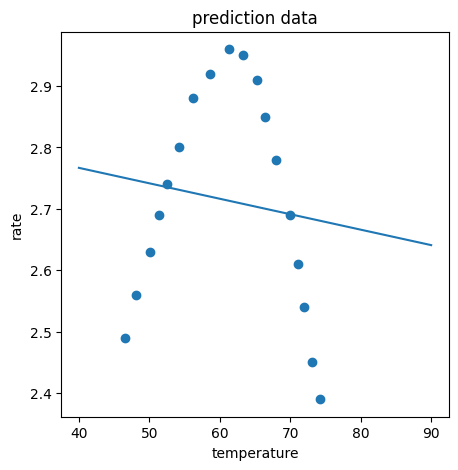

In [10]:
fig2 = plt.figure(figsize=(5,5))
plt.plot(X_range,y_range_predict)
plt.scatter(X_train,y_train)

plt.title('prediction data')
plt.xlabel('temperature')
plt.ylabel('rate')
plt.show()

In [11]:
#多項式模式
#generate new features
from sklearn.preprocessing import PolynomialFeatures
poly2 = PolynomialFeatures(degree=2) # 二階
X_2_train = poly2.fit_transform(X_train)
X_2_test = poly2.transform(X_test)

poly5 = PolynomialFeatures(degree=5) # 五階
X_5_train = poly5.fit_transform(X_train)
X_5_test = poly5.transform(X_test)
print(X_2_train)

[[1.0000000e+00 4.6530000e+01 2.1650409e+03]
 [1.0000000e+00 4.8140000e+01 2.3174596e+03]
 [1.0000000e+00 5.0150000e+01 2.5150225e+03]
 [1.0000000e+00 5.1360000e+01 2.6378496e+03]
 [1.0000000e+00 5.2570000e+01 2.7636049e+03]
 [1.0000000e+00 5.4180000e+01 2.9354724e+03]
 [1.0000000e+00 5.6190000e+01 3.1573161e+03]
 [1.0000000e+00 5.8580000e+01 3.4316164e+03]
 [1.0000000e+00 6.1370000e+01 3.7662769e+03]
 [1.0000000e+00 6.3340000e+01 4.0119556e+03]
 [1.0000000e+00 6.5310000e+01 4.2653961e+03]
 [1.0000000e+00 6.6470000e+01 4.4182609e+03]
 [1.0000000e+00 6.8030000e+01 4.6280809e+03]
 [1.0000000e+00 6.9970000e+01 4.8958009e+03]
 [1.0000000e+00 7.1130000e+01 5.0594769e+03]
 [1.0000000e+00 7.1890000e+01 5.1681721e+03]
 [1.0000000e+00 7.3050000e+01 5.3363025e+03]
 [1.0000000e+00 7.4210000e+01 5.5071241e+03]]


In [12]:
lr2 = LinearRegression()
lr2.fit(X_2_train,y_train)

y_2_train_predict = lr2.predict(X_2_train)
y_2_test_predict = lr2.predict(X_2_test)
r2_2_train = r2_score(y_train,y_2_train_predict)
r2_2_test = r2_score(y_test,y_2_test_predict)

lr5 = LinearRegression()
lr5.fit(X_5_train,y_train)

y_5_train_predict = lr5.predict(X_5_train)
y_5_test_predict = lr5.predict(X_5_test)
r2_5_train = r2_score(y_train,y_5_train_predict)
r2_5_test = r2_score(y_test,y_5_test_predict)


print('training r2_2:',r2_2_train)
print('test r2_2:',r2_2_test)
print('training r2_5:',r2_5_train)
print('test r2_5:',r2_5_test)

training r2_2: 0.9700515400689422
test r2_2: 0.9963954556468684
training r2_5: 0.9978527267187236
test r2_5: 0.5437837627383081


In [13]:
X_2_range = np.linspace(40,90,300).reshape(-1,1)
X_2_range = poly2.transform(X_2_range)
y_2_range_predict = lr2.predict(X_2_range)

X_5_range = np.linspace(40,90,300).reshape(-1,1)
X_5_range = poly5.transform(X_5_range)
y_5_range_predict = lr5.predict(X_5_range)

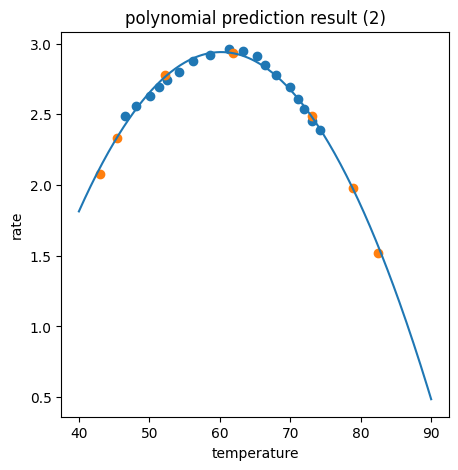

In [14]:
fig3 = plt.figure(figsize=(5,5))
plt.plot(X_range,y_2_range_predict)
plt.scatter(X_train,y_train)
plt.scatter(X_test,y_test)

plt.title('polynomial prediction result (2)')
plt.xlabel('temperature')
plt.ylabel('rate')
plt.show()

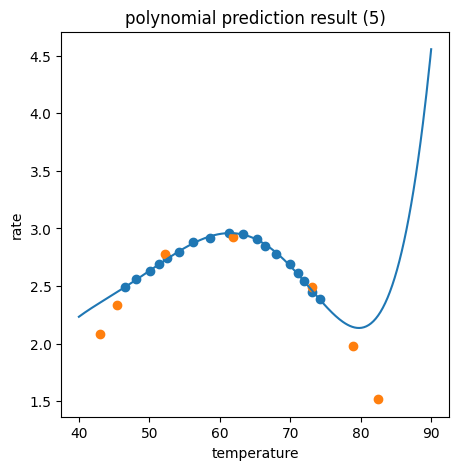

In [15]:
fig4 = plt.figure(figsize=(5,5))
plt.plot(X_range,y_5_range_predict)
plt.scatter(X_train,y_train)
plt.scatter(X_test,y_test)

plt.title('polynomial prediction result (5)')
plt.xlabel('temperature')
plt.ylabel('rate')
plt.show()

酶活性預測實戰summary：
1. 通過建立二階多項式回歸模型，對酶活性實現一個較好的預測，無論針對訓練或測試數據都得到一個高的r2分數
2. 通過建立綫性回歸、五階多項式回歸模型，發現存在欠擬合或過擬合情況。過擬合情況下，對於訓練數據r2分數高（預測準確），但對於預測數據r2分數低（預測不準確）
3. 無論是通過r2分數，或是可視化模型結果，都可以發現二階多項式回歸模型效果最好